# CUPED

## 📌 Базовый принцип
**CUPED** (Controlled-experiment Using Pre-Experiment Data) — метод снижения дисперсии в A/B-тестах за счет корректировки целевой метрики **Y** с помощью ковариаты **X** (данные до эксперимента).

**Формула:**
$$
Y_{\text{CUPED}} = Y - \theta X
$$

где:
- $ X $ — ковариата (предэкспериментальные данные)
- $ \theta $ — оптимальный коэффициент коррекции

---

## 🔍 Как найти θ?
**Цель:** минимизировать дисперсию $ Y_{\text{CUPED}} $

**Вывод коэффициента:**
1. Раскрываем дисперсию:
$$
\text{Var}(Y_{\text{CUPED}}) = \text{Var}(Y) + \theta^2 \text{Var}(X) - 2\theta \text{Cov}(X,Y)
$$

2. Берем производную по θ и приравниваем к 0:
$$
2\theta \text{Var}(X) - 2\text{Cov}(X,Y) = 0
$$

3. Оптимальный θ:
$$
\theta = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}
$$

**Итоговая дисперсия:**
$$
\text{Var}(Y_{\text{CUPED}}) = \text{Var}(Y)(1 - \rho^2)
$$
где $ \rho = \text{Corr}(X,Y) $

---

## 🎯 Примеры ковариат

"Любая метрика, коррелирующая с целевой, на которую тритмент не повлияет"

1. **Те же метрики до теста**  
   - Для Retention: Retention за предыдущий месяц
   - Для CTR: CTR за прошлую неделю

2. **Синтетические предикторы**  
   - ML предсказание метрики на базе исторических данных

   https://habr.com/ru/companies/avito/articles/590105/ 

3. **Идеи для других метрик**  
   - Среднее время сессии за последние 7 дней
   - Частота использования фичи до эксперимента

4. **Демография/Техпараметры**  
   - Возраст, страна, тип устройства (если стабильны)

---

## 💡 Кейсы применения
### Netflix (из статьи)
- Для **streaming hours** у существующих пользователей:
  - CUPED снизил дисперсию на **40%**
  - Ковариата: streaming hours за месяц до эксперимента

### Microsoft (Deng et al., 2013)
- **Метрика:** CTR 
- **Ковариата:** СTR за последние 2 недели
- **Результат:** От остановки эксперимента через 2 недели без эффекта до 1 дня с прокрасом

---

## ⚠️ Важно
1. **Корреляция — ключ**  
   Минимальный требуемый $ |\rho| > 0.3 $

2. **Стабильность ковариат**  
   Ковариата не должна зависеть от экспериментального воздействия

3. **Для новых пользователей**  
   Эффект слабее из-за недостатка исторических данных (в Netflix: 5-15% снижения дисперсии)

4. **Категориальные ковариаты**  
   Для стратификации по N группам CUPED эквивалентен пост-стратификации. При стратификации по группам CUPED становится эквивалентен регрессии с dummy-переменными (Deng et al., 2013).

5. **Good old МНК**
   
   CUPED — частный случай регрессии с фиксированным θ. (не эквивалент, есть свои нюансы)

   https://habr.com/ru/companies/X5Tech/articles/768008/ 

   https://github.com/bdemeshev/cuped_statistician_viewpoint/blob/main/cuped_stat_viewpoint.pdf
   

# Стратификация:

## 📌 Базовый принцип
**Стратификация** — разделение популяции на однородные подгруппы (страты) **до** запуска эксперимента.  
**Цель**: снижение дисперсии метрик через минимизацию внутригрупповой вариации.

**Пример**: Распределение среднего времени поездки курьеров по городам

| Город    | Доля курьеров | Среднее время (мин) | Ст. отклонение (мин) |
|----------|---------------|----------------------|------------------------------|
| Москва   | 60%           | 45                   | 15                           |
| Липецк   | 20%           | 25                   | 8                            |
| Омск     | 20%           | 30                   | 10                           |


То есть, нам известна **дополнительная информация** о распределении, которая может позволить **более точно оценить математическое ожидание**. Как бы нам это сделать? 

## 🔍  Стратифицированное среднее

Рассмотрим страту, как такую случайную величину, о совместном распределении которой с нашей целевой переменной нам что-то известно (а, то есть, матожидание и дисперсия, из таблички выше)

- $Y$ — время доставки (наша целевая переменная)
- $Z$ — город (стратификационная переменная)
- $\mu = \mathbb{E}[Y]$
- $ \sigma = \text{Var}(Y) $
- $ \mu_k = \mathbb{E}[Y|Z=k] $ — условное матожидание времени доставки в страте $ k $
- $ \sigma_k^2 = \text{Var}(Y|Z=k) $ — условная дисперсия времени в страте $ k $
- $ p_k = P(Z=k) $ — вероятность получить наблюдение из страты $k$ (доля наблюдений в страте $ k $)

Теперь введем новое понятие - **стратифицированное среднее**

**Обычное выборочное среднее** для выборки из $ N $ наблюдений:

$$
\bar{Y} = \frac{1}{N} \sum_{i=1}^N Y_i
$$

среднее в страте $ k $: 

$$ \bar{Y}_k = \frac{1}{n_k} \sum_{i=1}^{n_k} Y_{i,k} $$ 

Тогда **стратифицированное среднее**:
$$
\bar{Y}_{strat} = \sum_{k=1}^K p_k \bar{Y}_k
$$

Связь с обычным средним

$$
\bar{Y}_{strat} = \frac{1}{N} \sum_{k=1}^K \sum_{i=1}^{n_k} Y_{i,k} = \bar{Y}
$$
Таким образом, стратифицированная оценка **обобщает** обычное среднее для структурированных данных.

**Матожидание стратифицированного среднего**:
$$
\mathbb{E}[\bar{Y}_{strat}] = \mathbb{E}\left[\sum_{k=1}^K p_k \bar{Y}_k\right] = \sum_{k=1}^K p_k \mathbb{E}[\bar{Y}_k] = \sum_{k=1}^K p_k \mu_k = \mu
$$


### Дисперсия стратифицированного среднего

Гвоздь программы, то ради чего все затеяли: 

Взвешенное среднее:
   $$
   \hat{Y}_{\text{strat}} = \sum_{k=1}^K p_k \bar{Y}_k
   $$
Независимость страт → дисперсия суммы = сумме дисперсий:
   $$
   \text{Var}(\hat{Y}_{\text{strat}}) = \sum_{k=1}^K p_k^2 \cdot \text{Var}(\bar{Y}_k)
   $$
Дисперсия среднего в страте:
   $$
   \text{Var}(\bar{Y}_k) = \frac{\sigma_k^2}{n_k} = \frac{\sigma_k^2}{n p_k}
   $$
Подставляем:
   $$
   \text{Var}_{\text{strat}}(\hat{Y}_{\text{strat}}) = \sum_{k=1}^K p_k^2 \cdot \frac{\sigma_k^2}{n p_k} = \frac{1}{n} \sum_{k=1}^K p_k \sigma_k^2
   $$

А теперь покажем, что **дисперсия такого среднего ниже**

По [закону о полной дисперсии](https://ru.wikibrief.org/wiki/Law_of_total_variance):  
   $$\text{Var}(Y) = \mathbb{E}[\text{Var}(Y|Z)] + \text{Var}(\mathbb{E}[Y|Z])$$

Внутристратовая дисперсия:  
   $$\mathbb{E}[\text{Var}(Y|Z)] = \sum_{k} P(Z=k) \cdot \text{Var}(Y|Z=k) = \sum p_k \cdot \sigma_k^2$$

Межстратовая дисперсия:  
   $$\text{Var}(\mathbb{E}[Y|Z]) = \sum_{k} P(Z=k)(\mu_k - \mu)^2 = \sum p_k (\mu_k - \mu)^2$$
   

Итого 
$$
   \text{Var}_{\text{srs}}(Y) = \underbrace{\sum p_k \sigma_k^2}_{\text{внутристратовая}} + \underbrace{\sum p_k (\mu_k - \mu)^2}_{\text{межстратовая}}
$$

А в терминах средних: 

$$
   \text{Var}_{\text{srs}}(\bar{Y}) = \frac{1}{n} \sum_{k=1}^K p_k \sigma_k^2 + \frac{1}{n} \sum_{k=1}^K p_k (\mu_k - \mu)^2
$$

То есть 

$$ 
  \text{Var}(Y) - \text{Var}_{\text{strat}}(\hat{Y}_{\text{strat}}) = \frac{1}{n} \sum_{k=1}^K p_k (\mu_k - \mu)^2 \geq 0
$$

**Ключевой вывод**:  

Стратификация удаляет межстратовую компоненту дисперсии.

### Как использовать?

Самый простой дизайн с точки зрения теории: 
1. Сэмплируем по стратам
    
2. Рассчитываем стратифицированные средние и дисперсии в группах 

3. Запускаем ttest 

$$
t = \frac{\bar{Y}_{strat}^{test} - \bar{Y}_{strat}^{control}}{\sqrt{\hat{\sigma}_{test}^2 + \hat{\sigma}_{control}^2}}
$$

Степени свободы считаем как для обычного ttest: $n_{test} + n_{control} - 2$ для равных дисперсий и для неравных: 

$$
   df = \frac{(\hat{\sigma}_{test}^2 + \hat{\sigma}_{control}^2)^2}{\frac{(\hat{\sigma}_{test}^2)^2}{n_{test} - K} + \frac{(\hat{\sigma}_{control}^2)^2}{n_{control} - K}}
$$

Где вместо используем полученные оценки **стратифицированных дисперсий средних**


*На самом деле здесь старая добрая формула, главное помнить, используете вы дисперсию с. в. или средних*

$$
df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
$$




### 📌 Пост-стратификация

**Что если уже насэпмлировали случайным образом, а дисперсию уменьшить все же хочется?**
 


**Формула дисперсии** (аппроксимация для больших $n$):
$$
\text{Var}_{\text{srs}}(\hat{Y}_{\text{strat}}) \approx \frac{1}{n} \sum_{k=1}^K p_k \sigma_k^2 + \frac{1}{n^2} \sum_{k=1}^K (1-p_k) \sigma_k^2
$$

**Идея вывода**:
1. Условная дисперсия (при фиксированных $n_k$):
   $$
   \text{Var}_{\text{srs}}(\hat{Y}_{\text{strat}} | n_k) = \sum_{k=1}^K p_k^2 \cdot \frac{\sigma_k^2}{n_k}
   $$
2. Разложение по закону полной дисперсии:
   $$
   \text{Var}_{\text{srs}}(\hat{Y}_{\text{strat}}) = E[\text{Var}(\cdot | n_k)] + \text{Var}(E[\cdot | n_k])
   $$
3. Аппроксимация для больших $n$:
   - $E\left[\frac{1}{n_k}\right] \approx \frac{1}{n p_k} + \frac{1-p_k}{n^2 p_k^2}$
   - После упрощений получаем формулу выше.


**Ключевой вывод**:
> При $n \to \infty$:
> $$
> \text{Var}_{\text{post-strat}} \approx \text{Var}_{\text{strat}} + O\left(\frac{1}{n^2}\right)
> $$
> Разница между стратификацией и пост-стратификацией становится пренебрежимой.

---

## 🎯 Примеры страт (из статьи Netflix)
1. **География**:  
   - Страны подписки (190 страт)  
   - Регионы внутри страны

2. **Техпараметры**:  
   - Тип устройства (Android/iOS/TV)  
   - Версия приложения

3. **Поведенческие**:  
   - Квартили стриминговой активности  
   - Бинарные пороги: $ T_i = I(\text{часы} > H_i) $

4. **Демография**:  
   - Возрастные группы  
   - Тип подписки (базовая/премиум)

---

<!-- ## 💡 Кейсы применения
### Netflix (оригинальный кейс)
- Для **streaming hours** у существующих пользователей:  
  - Стратификация по предшествующей активности  
  - Результат: 30-40% снижение дисперсии  
  - Проблема: дисбаланс из-за 100-слотовых сегментов

### E-commerce (доп. пример)
- **Метрика**: конверсия в покупку  
  - Страты: источники трафика (SEO/реклама/рефералы)  
  - Эффект: +25% мощности теста -->

---

## ⚠️ Практические нюансы
1. **Идеальные страты**:  
   - Объясняют ≥ 15% вариации метрики  
   - Минимальный размер: 5% популяции (Netflix guideline)

2. **Правило 3-7 страт**:  
   - Более 10 страт → риск overfitting и потери мощности


Оверстратификация https://www.sciencedirect.com/science/article/abs/pii/S1551714424000089 - хорошая статья кажется, но доступа к ней нет. Идейно: чем больше страт и меньше группы, тем больше шумы и выбросы влияют на результат

 # Практика

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
from scipy import stats
from tqdm import tqdm  # для прогресс-бара

Наш магазин мыла осуществляет доставку заказов на дом в разных регионах (Москва, Липецк, Омск), мы замеряем время доставки. Мы планируем части курьеров дать новые самокаты и надеемся, что это ускорит среднее время доставки 

Очевидно, что среднее время на дорогу по городу отличается в упомянутых регионах, поэтому для теста будет иметь смысл использовать стратификацию 

In [2]:
import dataset_generation
from importlib import reload

reload(dataset_generation)
# Параметры генерации
np.random.seed(42)
DAYS_BACK = 50  # Глубина исторических данных
COURIERS_TOTAL = 3000  # Общее количество курьеров


# Генерация данных
couriers_df = dataset_generation.generate_couriers(COURIERS_TOTAL)
orders_df = dataset_generation.generate_orders(couriers_df, DAYS_BACK)

orders_df.sample(5, random_state=42)

,order_id,courier_id,city,start_time,end_time,delivery_time
748699,ord_748699,c_2547,Москва,2025-03-09 04:57:36.430539,2025-03-09 05:35:36.430539,38.452137
816944,ord_816944,c_2562,Москва,2025-03-12 23:35:36.430539,2025-03-13 00:33:36.430539,58.054734
68707,ord_068707,c_2951,Липецк,2025-01-27 21:54:36.430539,2025-01-27 22:16:36.430539,22.531554
38655,ord_038655,c_0749,Липецк,2025-01-27 04:06:36.430539,2025-01-27 04:21:36.430539,15.322283
109585,ord_109585,c_1140,Омск,2025-01-31 01:33:36.430539,2025-01-31 01:57:36.430539,24.611980


В качестве метрики берем средние покурьерные средние 

📊 Описательная статистика по городам:
             mean       std  count        min        max
city                                                    
Липецк  25.217075  2.824152    615  19.626003  30.959394
Москва  44.953610  5.184619   1777  33.215715  57.394109
Омск    30.072979  3.232886    608  23.339291  37.017860


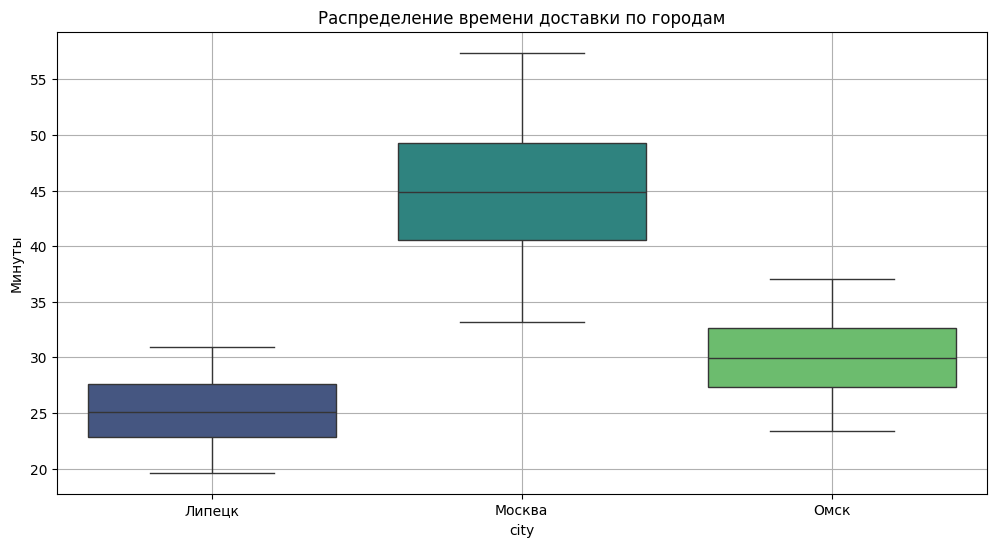


📌 Доля дисперсии, объясняемая городом (R²): 79.20%


In [3]:
DATE_CUTOFF = "2025-02-24"
CITIES = ["Москва", "Липецк", "Омск"]

time_by_courier = (
    orders_df.query(f"start_time < '{DATE_CUTOFF}'")
    .groupby(["city", "courier_id"])
    .agg({"delivery_time": "mean"})
    .reset_index()
)

import utils

reload(utils)
from utils import perform_eda


perform_eda(time_by_courier)

In [4]:
historical = orders_df[orders_df["start_time"] < DATE_CUTOFF]

# "истинные доли"
city_proportions = historical["city"].value_counts(normalize=True).to_dict()


def prepare_courier_data(df, start_date):
    """Считаем среднее время доставки по курьерам после указанной даты"""

    return (
        df[df["start_time"] > start_date]
        .groupby("courier_id")
        .agg(delivery_time=("delivery_time", "mean"), city=("city", "first"))
        .reset_index()
    )

In [5]:
def regular_ttest(control_means, treatment_means):
    return stats.ttest_ind(control_means, treatment_means).pvalue


def calc_strat_mean(df: pd.DataFrame, weights: pd.Series):
    """Strat. mean with prior weights"""
    strat_mean = df.groupby("city")["delivery_time"].mean().reset_index()
    return (strat_mean["delivery_time"] * strat_mean.city.map(weights)).sum()


def calc_strat_var(df: pd.DataFrame, weights: pd.Series):
    """Strat. mean with prior weights"""
    strat_var = df.groupby("city")["delivery_time"].var().reset_index()
    return (strat_var["delivery_time"] * strat_var.city.map(weights)).sum()


def ttest_strat(test, control, weights, var_equal=True):
    """
    Стратифицированный t-тест с поддержкой Welch’s df

    Двусторонняя альтернативная гипотеза

    Параметры:
    var_equal - если False, используется Welch-Satterthwaite df
    """
    # Расчет стратифицированных средних и дисперсий
    mean1 = calc_strat_mean(test, weights)
    mean2 = calc_strat_mean(control, weights)
    var1 = calc_strat_var(test, weights)
    var2 = calc_strat_var(control, weights)

    n1 = len(test)
    n2 = len(control)
    delta_mean = mean1 - mean2
    std_error = np.sqrt(var1 / n1 + var2 / n2)
    t_stat = delta_mean / std_error

    # Расчет степеней свободы
    if var_equal:
        df = n1 + n2 - 2
    else:
        # Welch-Satterthwaite equation
        numerator = (var1 / n1 + var2 / n2) ** 2
        denominator = ((var1 / n1) ** 2 / (n1 - 1)) + ((var2 / n2) ** 2 / (n2 - 1))
        df = numerator / denominator  # дробное значение

    p_value = 2.0 * stats.t.cdf(-abs(t_stat), df)
    return p_value

In [6]:
### случайное сэмплирование
from sklearn.model_selection import train_test_split


def split_test_control(future_df, test_size=0.5, total_sample=None, random_state=None):
    """
    Случайно разделяет курьеров на тестовую и контрольную группы

    Параметры:
    future_df (DataFrame): Исходный датафрейм с курьерами
    test_size (float): Доля курьеров в тестовой группе (0.0-1.0)
    total_sample (int): Общее количество курьеров, участвующих в эксперименте
    random_state (int): Seed для воспроизводимости результатов

    Возвращает:
    tuple: (test_df, control_df) - две выборки данных
    """
    # Получаем уникальные идентификаторы курьеров
    unique_couriers = future_df["courier_id"].unique()

    # Если задан total_sample, ограничиваем выборку
    if total_sample:
        # Случайно выбираем total_sample курьеров из общего списка
        sampled_couriers = pd.Series(unique_couriers).sample(
            n=total_sample, random_state=random_state
        )
        # Ограничиваем future_df только выбранными курьерами
        future_df = future_df[future_df["courier_id"].isin(sampled_couriers)]

    # Пересчитываем уникальных курьеров после ограничения выборки
    unique_couriers = future_df["courier_id"].unique()

    # Вычисляем количество курьеров для тестовой группы
    n_test = int(len(unique_couriers) * test_size)

    # Случайно выбираем курьеров для тестовой группы
    test_couriers = pd.Series(unique_couriers).sample(
        n=n_test, random_state=random_state
    )

    # Разделяем данные на тестовую и контрольную группы
    test_df = future_df[future_df["courier_id"].isin(test_couriers)]
    control_df = future_df[~future_df["courier_id"].isin(test_couriers)]

    return test_df, control_df


def stratify_sample_couriers(df, random_state=None, stratify_col="city", test_size=0.5):
    """
    Стратифицированное разделение курьеров на тестовую и контрольную группы

    Параметры:
    df (pd.DataFrame): Исходный датафрейм с курьерами
    stratify_col (str): Колонка для стратификации (по умолчанию 'city')
    test_size (float): Доля тестовой группы (0.0-1.0)
    random_state (int): Seed для воспроизводимости

    Возвращает:
    (test_df, control_df): Кортеж из тестового и контрольного датафреймов
    """
    # Уникальные курьеры
    unique_couriers = df[["courier_id", stratify_col]].drop_duplicates()

    # Стратифицированное разбиение
    train, test = train_test_split(
        unique_couriers,
        test_size=test_size,
        stratify=unique_couriers[stratify_col],
        random_state=random_state,
    )

    # Собираем полные данные для групп
    test_df = df.merge(test[["courier_id"]], on="courier_id")
    control_df = df.merge(train[["courier_id"]], on="courier_id")

    return test_df, control_df

In [7]:
# отсюда будем сэмплировать
future = prepare_courier_data(orders_df, DATE_CUTOFF)

future.head()

,courier_id,delivery_time,city
0,c_0000,49.024803,Москва
1,c_0001,27.908885,Омск
2,c_0002,25.706838,Липецк
3,c_0003,53.098931,Москва
4,c_0004,48.813538,Москва


Сравниваем результаты случайного сэмплирования и стратификации

In [8]:
import matplotlib.pyplot as plt


def plot_pvalue_distribution(dict_pvalues):
    """Рисует графики распределения p-value."""
    X = np.linspace(0, 1, 1000)
    for name, pvalues in dict_pvalues.items():
        Y = [np.mean(pvalues < x) for x in X]
        plt.plot(X, Y, label=name)

    plt.plot([0, 1], [0, 1], "--k", alpha=0.8)
    plt.title("Оценка распределения p-value", size=16)
    plt.xlabel("p-value", size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

In [9]:
SAMPLE_SIZE = 600  # общий размер выборки

Доля ошибок первого рода: 0.06


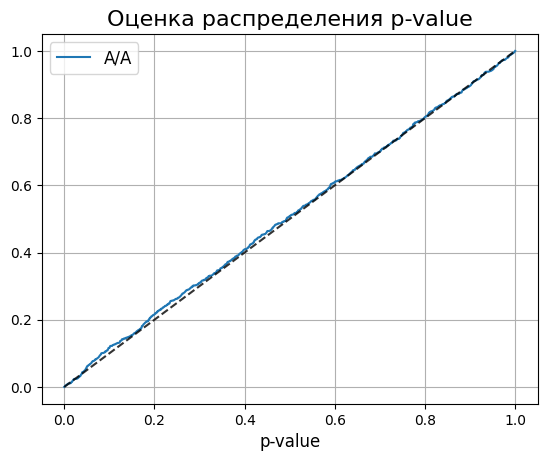

In [10]:
alpha = 0.05  # допустимая вероятность ошибки I рода

pvalues_aa = []
for _ in range(1000):
    test, control = split_test_control(future, test_size=0.5, total_sample=SAMPLE_SIZE)
    pvalues_aa.append(regular_ttest(test["delivery_time"], control["delivery_time"]))

error_rate = np.mean(np.array(pvalues_aa) < alpha)
print(f"Доля ошибок первого рода: {error_rate:0.2f}")

plot_pvalue_distribution({"A/A": pvalues_aa})

Доля ошибок первого рода: 0.06


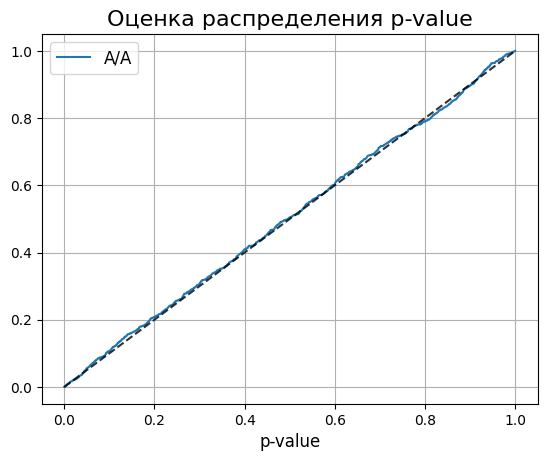

In [11]:
alpha = 0.05  # допустимая вероятность ошибки I рода

pvalues_aa = []
for _ in range(1000):
    test, control = stratify_sample_couriers(
        future,
        test_size=0.5,
    )
    pvalues_aa.append(ttest_strat(test, control, weights=city_proportions))

error_rate = np.mean(np.array(pvalues_aa) < alpha)
print(f"Доля ошибок первого рода: {error_rate:0.2f}")

plot_pvalue_distribution({"A/A": pvalues_aa})

Computing power for effect: 100%|██████████| 7/7 [01:01<00:00,  8.83s/it]


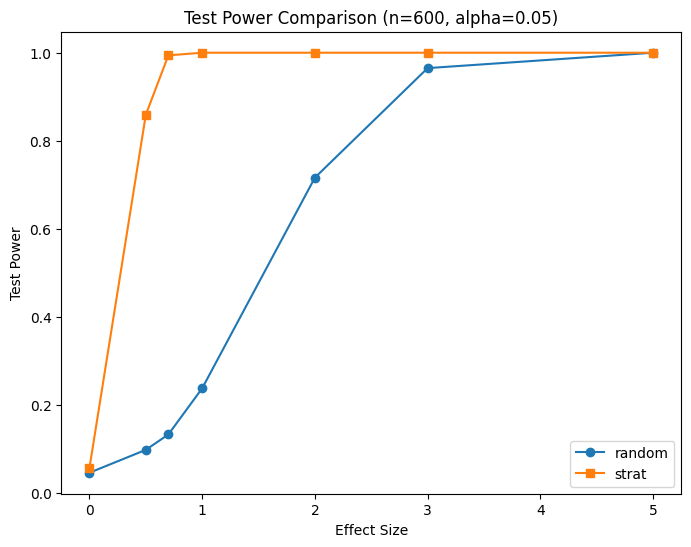

In [12]:
random_powers = []
strat_powers = []

alpha_level = 0.05

EFFECTS = [0, 0.5, 0.7, 1, 2, 3, 5]  # эффекты для проверки (0 для О1Р)

for effect in tqdm(EFFECTS, desc="Computing power for effect"):
    random_p = []
    strat_p = []
    for _ in range(1000):
        test, control = split_test_control(
            future, test_size=0.5, total_sample=SAMPLE_SIZE
        )
        test["delivery_time"] = test["delivery_time"] + effect
        random_p.append(regular_ttest(test["delivery_time"], control["delivery_time"]))

        test, control = stratify_sample_couriers(
            future,
            test_size=0.5,
        )
        test["delivery_time"] = test["delivery_time"] + effect
        strat_p.append(ttest_strat(test, control, weights=city_proportions))

    random_powers.append(np.mean(np.array(random_p) < alpha_level))
    strat_powers.append(np.mean(np.array(strat_p) < alpha_level))

plt.figure(figsize=(8, 6))
plt.plot(EFFECTS, random_powers, marker="o", label="random")
plt.plot(EFFECTS, strat_powers, marker="s", label="strat")
plt.xlabel("Effect Size")
plt.ylabel("Test Power")
plt.title(f"Test Power Comparison (n={SAMPLE_SIZE}, alpha={alpha_level})")
plt.legend()
plt.show()

Итак, мы научились, имея исторические пропорции страт, сильно повышать мощность теста. Но можно ли еще лучше?

На самом деле, да.

## Оптимальное разбиение 

Что если в нашем распределении есть небольшая страта с высокой дисперсией? А например в другой большой страте (50% выборки допустим) дисперсия не очень большая, и для точной оценки среднего в ней много наблюдений не нужно

Можем ли как-то скорректировать $n_k$, чтобы накинуть в первую побольше?

### Постановка задачи

Требуется найти оптимальное распределение объёма выборки $n$ между $K$ стратами, чтобы **минимизировать дисперсию стратифицированного среднего** при заданном общем размере выборки. Сначала чуть иначе запишем дисперсию среднего, чтобы остаться в терминах $n_k$

$$
   \text{Var}_{\text{strat}}(\hat{Y}_{\text{strat}}) = \sum_{k=1}^K p_k^2 \cdot \frac{\sigma_k^2}{n p_k} = \sum_{k=1}^K p_k^2 \cdot \frac{\sigma_k^2}{n_k} 
$$


**Целевая функция** (минимизация дисперсии):

$$
\text{Var}_{\text{strat}}(\hat{Y}_{\text{strat}}) = \sum_{l=1}^{K} \frac{p_k^2 \sigma_k^2}{n_k} \rightarrow \min_{n_k}
$$

**Ограничения**:
1. Суммарный размер выборки:  
   $$
   \sum_{k=1}^{K} n_k = n
   $$
2. Неотрицательность:  
   $$
   n_k \geq 0 \quad \text{для всех } l = 1, 2, \ldots, K
   $$

Переменные оптимизации: 

- $n_k$ — объём выборки в $k$-й страте.

Параметры:

- $p_k = \frac{N_k}{N}$ — доля $k$-й страты в генеральной совокупности;
- $\sigma_k^2$ — дисперсия признака в $k$-й страте;


### Решение

$$
\mathcal{L}(n_1, ..., n_K, \lambda) = \sum_{k=1}^K \frac{p_k^2 \sigma_k^2}{n_k} + \lambda \left( \sum_{k=1}^K n_k - n \right) \rightarrow \min_{n_k}
$$

Оптимальное распределение достигается при **размещении по Нейману**:

$$
n_k = n \cdot \frac{p_k \sigma_k}{\sum_{i=1}^{K} p_i \sigma_i}
$$

### Свойства
- Чем выше дисперсия $\sigma_k^2$ в страте, тем больше выборки ей выделяется.
- Если $\sigma_k$ одинаковы для всех страт, решение сводится к пропорциональному распределению $n_k = n p_k$.
